In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
#import folium
#from folium.plugins import HeatMap
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, SGDRegressor, HuberRegressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, ExtraTreesRegressor
from sklearn import metrics

In [ ]:
df_features = pd.read_csv("/content/drive/MyDrive/Pess/Cursos/DEX06/Hackaton 2502/features.csv", parse_dates=['Date'])
df_stores = pd.read_csv("/content/drive/MyDrive/Pess/Cursos/DEX06/Hackaton 2502/stores.csv")
df_train = pd.read_csv("/content/drive/MyDrive/Pess/Cursos/DEX06/Hackaton 2502/train.csv", parse_dates=['Date'])


In [ ]:
df_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         8190 non-null   int64         
 1   Date          8190 non-null   datetime64[ns]
 2   Temperature   8190 non-null   float64       
 3   Fuel_Price    8190 non-null   float64       
 4   MarkDown1     4032 non-null   float64       
 5   MarkDown2     2921 non-null   float64       
 6   MarkDown3     3613 non-null   float64       
 7   MarkDown4     3464 non-null   float64       
 8   MarkDown5     4050 non-null   float64       
 9   CPI           7605 non-null   float64       
 10  Unemployment  7605 non-null   float64       
 11  IsHoliday     8190 non-null   bool          
dtypes: bool(1), datetime64[ns](1), float64(9), int64(1)
memory usage: 712.0 KB


In [ ]:
df_features.isnull().sum()/len(df_features)

Store           0.000000
Date            0.000000
Temperature     0.000000
Fuel_Price      0.000000
MarkDown1       0.507692
MarkDown2       0.643346
MarkDown3       0.558852
MarkDown4       0.577045
MarkDown5       0.505495
CPI             0.071429
Unemployment    0.071429
IsHoliday       0.000000
dtype: float64

In [ ]:
#CPI nulos preenchee com media?
#Unemployment = nulos preenche com media?

df_features

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,0.00,0.00,0.00,0.00,0.00,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,0.00,0.00,0.00,0.00,0.00,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,0.00,0.00,0.00,0.00,0.00,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,0.00,0.00,0.00,0.00,0.00,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,0.00,0.00,0.00,0.00,0.00,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False


In [ ]:
# merge das tabelas stores e features
df = df_train.merge(df_features, on=['Store','Date','IsHoliday']).sort_values(by=['Store','Date'])
df = df.merge(df_stores, on=['Store'])
df

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
2,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
3,1,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
4,1,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,93,2012-10-26,2487.80,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221
421566,45,94,2012-10-26,5203.31,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221
421567,45,95,2012-10-26,56017.47,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221
421568,45,97,2012-10-26,6817.48,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221


In [ ]:
df['MarkDown1'].fillna(0, inplace=True)
df['MarkDown2'].fillna(0, inplace=True)
df['MarkDown3'].fillna(0, inplace=True)
df['MarkDown4'].fillna(0, inplace=True)
df['MarkDown5'].fillna(0, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  bool          
 5   Temperature   421570 non-null  float64       
 6   Fuel_Price    421570 non-null  float64       
 7   MarkDown1     421570 non-null  float64       
 8   MarkDown2     421570 non-null  float64       
 9   MarkDown3     421570 non-null  float64       
 10  MarkDown4     421570 non-null  float64       
 11  MarkDown5     421570 non-null  float64       
 12  CPI           421570 non-null  float64       
 13  Unemployment  421570 non-null  float64       
 14  Type          421570 non-null  object        
 15  Size          421

In [ ]:
#TYPE = array(['A', 'B', 'C'], dtype=object)
df

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,A,151315
1,1,2,2010-02-05,50605.27,False,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,A,151315
2,1,3,2010-02-05,13740.12,False,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,A,151315
3,1,4,2010-02-05,39954.04,False,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,A,151315
4,1,5,2010-02-05,32229.38,False,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,93,2012-10-26,2487.80,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221
421566,45,94,2012-10-26,5203.31,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221
421567,45,95,2012-10-26,56017.47,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221
421568,45,97,2012-10-26,6817.48,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221


In [ ]:
df_corr = df.corr()

# Construindo gráfico de calor
corr_colorscale = [[0, '#ECF0F1'],[0.1, '#3498DB'],[0.5, '#FCFF4E'],[0.9, '#FF461F'],[1, '#9a0000']]
fig = px.imshow(df_corr, text_auto=True, aspect="auto", color_continuous_scale=corr_colorscale)
fig.show() 

In [ ]:
df_2 = df.groupby(['Store', 'Size', 'CPI', 'Unemployment'] , as_index = False).agg({'Weekly_Sales': 'sum' })
#df_2.sort_values(by=['Weekly_Sales'], ascending=False).head()

df_2.head()

,Store,Size,CPI,Unemployment,Weekly_Sales
0,1,151315,210.337426,7.808,1494251.50
1,1,151315,210.339968,7.808,1603955.12
2,1,151315,210.389546,7.808,1425100.71
3,1,151315,210.439123,7.808,1391256.12
4,1,151315,210.488700,7.808,1466058.28


In [ ]:
most_selling_store = df.groupby('Store').Weekly_Sales.sum().sort_values(ascending=False)
print(f"Store: {most_selling_store}")
# df_most_selling_store = df[df['Store'] == 20]
#df_most_selling_store = df.query('Store==@most_selling_store')
#df_most_selling_store[["Date","Weekly_Sales","Store"]].head()
most_selling_store

<AxesSubplot:xlabel='Size', ylabel='Weekly_Sales'>

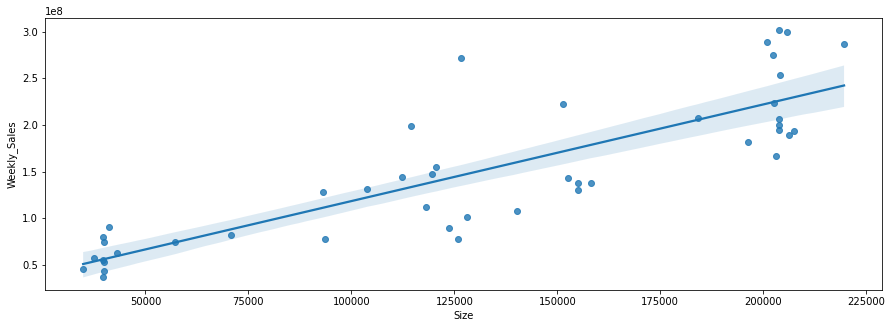

In [ ]:
# TAMANHO DA LOJA x VENDAS SEMANAIS
plt.figure(figsize=(15, 5))
sns.regplot(data=df_2, x='Size', y='Weekly_Sales')

In [ ]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315
1,1,2,2010-02-05,50605.27,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315
2,1,3,2010-02-05,13740.12,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315
3,1,4,2010-02-05,39954.04,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315
4,1,5,2010-02-05,32229.38,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315


In [ ]:
#data n entra em modeelo de regressão
df['IsHoliday']=df.IsHoliday.astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  int64         
 5   Temperature   421570 non-null  float64       
 6   Fuel_Price    421570 non-null  float64       
 7   MarkDown1     421570 non-null  float64       
 8   MarkDown2     421570 non-null  float64       
 9   MarkDown3     421570 non-null  float64       
 10  MarkDown4     421570 non-null  float64       
 11  MarkDown5     421570 non-null  float64       
 12  CPI           421570 non-null  float64       
 13  Unemployment  421570 non-null  float64       
 14  Type          421570 non-null  object        
 15  Size          421

In [ ]:
categoricas = ['Store', 'Dept', 'Type']

df = pd.get_dummies(data=df, columns=categoricas)

In [ ]:
#df.head()
df_sample = df.sample(1000, random_state=1000)
df_sample.head()

,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,...,Dept_93,Dept_94,Dept_95,Dept_96,Dept_97,Dept_98,Dept_99,Type_A,Type_B,Type_C
232430,2011-07-29,1978.57,0,74.84,4.004,0.00,0.00,0.00,0.00,0.00,...,0,0,0,0,0,0,0,1,0,0
395545,2011-11-25,565.85,1,60.68,3.760,25.80,0.00,4.70,0.00,1932.72,...,0,0,0,0,0,0,0,0,0,1
286229,2012-09-28,8977.95,0,62.17,4.018,4039.87,7.91,1.98,687.56,3822.63,...,0,0,0,0,0,0,0,0,1,0
4962,2011-06-03,44919.99,0,83.00,3.699,0.00,0.00,0.00,0.00,0.00,...,0,0,0,0,0,0,0,1,0,0
312835,2012-06-29,54078.77,0,81.95,3.693,3333.19,599.50,0.00,798.18,2945.01,...,0,1,0,0,0,0,0,1,0,0


In [ ]:
x = df_sample.drop(columns=['Date', 'Weekly_Sales'])
y = df_sample['Weekly_Sales']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state=42)

In [ ]:
scaler = MinMaxScaler()
df_sample_norm = pd.DataFrame(scaler.fit_transform(x), index=x.index, columns=x.columns)

In [ ]:
df_sample_norm.head()

,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,...,Dept_93,Dept_94,Dept_95,Dept_96,Dept_97,Dept_98,Dept_99,Type_A,Type_B,Type_C
232430,0.0,0.733101,0.770026,0.000000,0.000061,0.000002,0.000000,0.000000,0.097874,0.429270,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
395545,1.0,0.583307,0.643928,0.000291,0.000061,0.000045,0.000000,0.017810,0.037295,0.382883,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
286229,0.0,0.599069,0.777261,0.045573,0.000142,0.000020,0.011892,0.035225,0.125314,0.530956,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4962,0.0,0.819422,0.612403,0.000000,0.000061,0.000002,0.000000,0.000000,0.881952,0.364482,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
312835,0.0,0.808315,0.609302,0.037601,0.006194,0.000002,0.013806,0.027138,0.709060,0.403584,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
#a. Linear Regression
model_linear = LinearRegression()
model_linear.fit(x_train, y_train)

#b. SGDRegressor
model_sgd = SGDRegressor(alpha = 0.0001,
  average= False,
  early_stopping= False,
  epsilon= 0.1,
  eta0= 0.01,
  fit_intercept= True,
  l1_ratio= 0.15,
  learning_rate= 'adaptive',
  loss= 'squared_error',
  max_iter= 1000,
  n_iter_no_change= 5,
  penalty= 'l2',
  power_t= 0.25,
  random_state= None,
  shuffle= True,
  tol= 0.001,
  validation_fraction= 0.1,
  verbose= 0,
  warm_start= False)
model_sgd.fit(x_train, y_train)

#c. GradientBoostingRegressor
model_gradient = GradientBoostingRegressor()
model_gradient.fit(x_train, y_train)

#d. ExtraTreesRegressor
model_extra_trees = ExtraTreesRegressor()
model_extra_trees.fit(x_train, y_train)

#e. RandomForestRegressor
model_random_forest = RandomForestRegressor()
model_random_forest.fit(x_train, y_train)

#f. HuberReg
model_huber = HuberRegressor()
model_huber.fit(x_train, y_train)

HuberRegressor()

In [ ]:
#a. Linear Regression
y_pred = model_linear.predict(x_test)
print("MAE:", metrics.mean_absolute_error(y_test, y_pred))
print("MSE:", metrics.mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 7412.590840666198
MSE: 113487606.42494068
RMSE: 10653.056201153764


In [ ]:
#b. SGDRegressor
y_pred = model_sgd.predict(x_test)
print("MAE:", metrics.mean_absolute_error(y_test, y_pred))
print("MSE:", metrics.mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1.005668074372151e+16
MSE: 1.5377108026802305e+32
RMSE: 1.2400446776952154e+16


In [ ]:
#c. GradientBoostingRegressor
y_pred = model_gradient.predict(x_test)
print("MAE:", metrics.mean_absolute_error(y_test, y_pred))
print("MSE:", metrics.mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 7342.074475237187
MSE: 121096254.48075561
RMSE: 11004.374333907204


In [ ]:
#d. ExtraTreesRegressor
y_pred = model_extra_trees.predict(x_test)
print("MAE:", metrics.mean_absolute_error(y_test, y_pred))
print("MSE:", metrics.mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 4780.521552999998
MSE: 68024011.2333835
RMSE: 8247.667017610707


In [ ]:
#e. RandomForestRegressor
y_pred = model_random_forest.predict(x_test)
print("MAE:", metrics.mean_absolute_error(y_test, y_pred))
print("MSE:", metrics.mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 5479.345629999999
MSE: 88821916.96200772
RMSE: 9424.53802379765


In [ ]:
#f. HuberReg
y_pred = model_huber.predict(x_test)
print("MAE:", metrics.mean_absolute_error(y_test, y_pred))
print("MSE:", metrics.mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 10560.651289222986
MSE: 307772612.11654985
RMSE: 17543.449265083244


In [ ]:
model_sgd.get_params()

{'alpha': 0.0001,
 'average': False,
 'early_stopping': False,
 'epsilon': 0.1,
 'eta0': 0.01,
 'fit_intercept': True,
 'l1_ratio': 0.15,
 'learning_rate': 'invscaling',
 'loss': 'squared_error',
 'max_iter': 1000,
 'n_iter_no_change': 5,
 'penalty': 'l2',
 'power_t': 0.25,
 'random_state': None,
 'shuffle': True,
 'tol': 0.001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}